In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_pickle('train.p')
df['labels']
val=pd.read_pickle('valid.p')

In [ ]:
test=pd.read_pickle('test.p')
for item in test:
    print(item)

sizes
coords
features
labels


# Data insights

In [ ]:
for item in val:
    print(item)

coords
labels
features
sizes


In [ ]:
for item in df:
    print(item)

coords
labels
features
sizes


In [ ]:
df['coords'].shape,df['labels'].shape,df['features'].shape,df['sizes'].shape

((34799, 4), (34799,), (34799, 32, 32, 3), (34799, 2))

In [ ]:
df['labels'].min(),df['labels'].max()
##labels is the output


(0, 42)

In [ ]:
df['coords'].astype('float32')

array([[  6.,   5.,  21.,  20.],
       [  6.,   6.,  22.,  22.],
       [  5.,   6.,  22.,  23.],
       ...,
       [ 17.,  15., 178., 155.],
       [ 17.,  15., 183., 160.],
       [ 20.,  18., 211., 184.]], dtype=float32)

# Converting array into tensor 

In [ ]:
y=df['labels'].astype('float32')
x=df['features']
x=tf.image.rgb_to_grayscale(x,name=None)
x.shape
x=x/255
y=tf.convert_to_tensor(y)



In [ ]:
x_test=test['features']
x_test=tf.image.rgb_to_grayscale(x_test,name=None)

x_test=x_test/255
y_test=test['labels'].astype('float32')
x_test.shape,y_test.shape
y_test=tf.convert_to_tensor(y_test)


In [ ]:
x_val=val['features']
x_val=tf.image.rgb_to_grayscale(x_val,name=None)

x_val=x_val/255
y_val=val['labels'].astype('float32')
y_val=tf.convert_to_tensor(y_val)


In [ ]:
df['sizes']

array([[ 26,  25],
       [ 27,  27],
       [ 27,  28],
       ...,
       [194, 169],
       [201, 175],
       [230, 201]], dtype=uint8)

In [ ]:
import pickle
with open('train.p', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

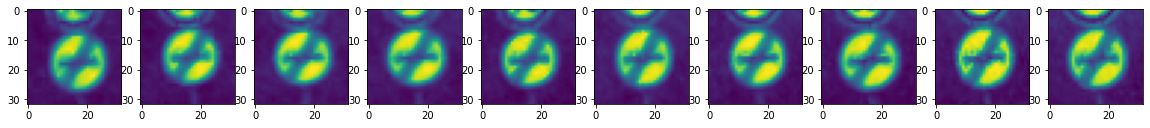

In [ ]:
f=plt.figure(figsize=(20,20))
for num in range(10):
    f.add_subplot(1,10,num+1)
    plt.imshow(x[num])

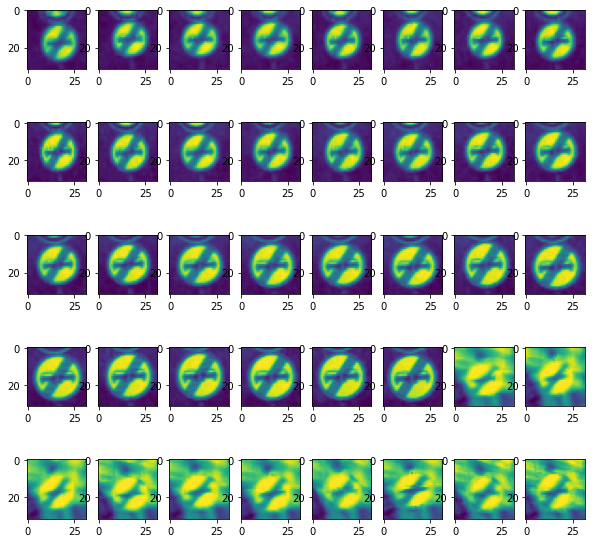

In [ ]:
plt.figure(figsize=(10,10))

for i in range(40):
    plt.subplot(5,8,i+1)
    plt.imshow(x[i])
   # plt.title(y[i])

In [ ]:
y[:500]

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
       41., 41.,

In [ ]:
#y.shape
y_val
x.shape

TensorShape([34799, 32, 32, 1])

# Creating CNN Model 

In [ ]:
from keras import layers
model=keras.Sequential([
    layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(10,(5,5),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(84,activation='relu'),
    layers.Dense(43,activation='softmax')
    
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 10)        1510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
alpha=(x_val,y_val)

In [ ]:
fit_mod=model.fit(x,y,epochs=10,validation_data=alpha)

Epoch 1/10
1088/1088 [==============================] - 12s 11ms/step - loss: 1.4843 - accuracy: 0.6014 - val_loss: 0.7513 - val_accuracy: 0.7932
Epoch 2/10
1088/1088 [==============================] - 11s 11ms/step - loss: 0.3986 - accuracy: 0.8907 - val_loss: 0.5164 - val_accuracy: 0.8619
Epoch 3/10
1088/1088 [==============================] - 13s 12ms/step - loss: 0.2294 - accuracy: 0.9386 - val_loss: 0.4535 - val_accuracy: 0.8744
Epoch 4/10
1088/1088 [==============================] - 18s 17ms/step - loss: 0.1617 - accuracy: 0.9563 - val_loss: 0.3917 - val_accuracy: 0.8923
Epoch 5/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1193 - accuracy: 0.9678 - val_loss: 0.4194 - val_accuracy: 0.8980
Epoch 6/10
1088/1088 [==============================] - 21s 19ms/step - loss: 0.0945 - accuracy: 0.9731 - val_loss: 0.4931 - val_accuracy: 0.8844
Epoch 7/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0811 - accuracy: 0.9768 - val_loss: 0.4125 -

# Evaluating train,validation W/O Dropout layer

In [ ]:
for element in fit_mod.history:
    print(element)

loss
accuracy
val_loss
val_accuracy


Text(0, 0.5, 'Validation Loss')

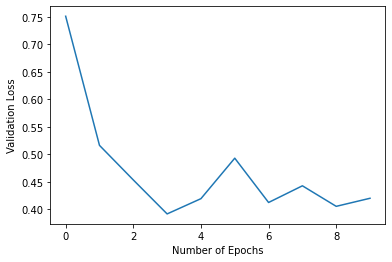

In [ ]:
#### Validation loss plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['val_loss'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Validation Loss")


Text(0, 0.5, 'Validation data accuracy')

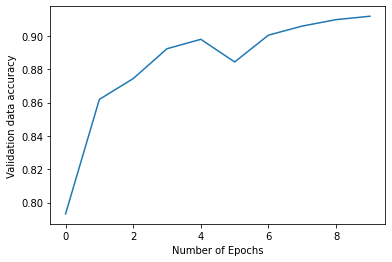

In [ ]:
#### Validation Accuracy plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['val_accuracy'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Validation data accuracy")


Text(0, 0.5, 'Train data Loss')

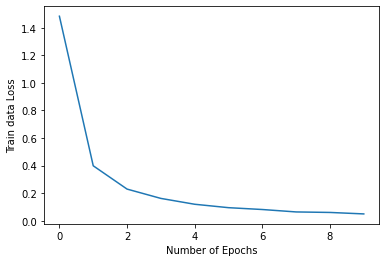

In [ ]:
#### Train loss plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['loss'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Train data Loss")

Text(0, 0.5, 'Train data accuracy')

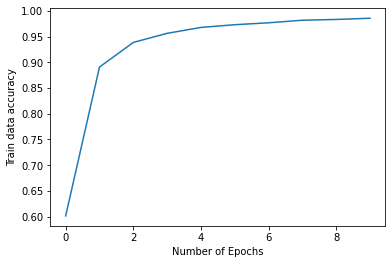

In [ ]:
#### Train Accuracy plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['accuracy'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Train data accuracy")


In [ ]:
model.evaluate(x_test,y_test)

395/395 [==============================] - 4s 11ms/step - loss: 0.8838 - accuracy: 0.8971


[0.8838465213775635, 0.8970704674720764]

# Model with dropout layer

In [ ]:
model_dropout=keras.Sequential([
    layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(10,(5,5),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(84,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(43,activation='softmax')
    
])

In [ ]:
model_dropout.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [ ]:
fit_mod_drop=model_dropout.fit(x,y,epochs=10,validation_data=alpha)

Epoch 1/10
1088/1088 [==============================] - 22s 20ms/step - loss: 2.3377 - accuracy: 0.3501 - val_loss: 0.9900 - val_accuracy: 0.7603
Epoch 2/10
1088/1088 [==============================] - 21s 19ms/step - loss: 1.0252 - accuracy: 0.6860 - val_loss: 0.5731 - val_accuracy: 0.8426
Epoch 3/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.7051 - accuracy: 0.7831 - val_loss: 0.3681 - val_accuracy: 0.8998
Epoch 4/10
1088/1088 [==============================] - 13s 12ms/step - loss: 0.5606 - accuracy: 0.8270 - val_loss: 0.2948 - val_accuracy: 0.9127
Epoch 5/10
1088/1088 [==============================] - 14s 12ms/step - loss: 0.4752 - accuracy: 0.8520 - val_loss: 0.2551 - val_accuracy: 0.9272
Epoch 6/10
1088/1088 [==============================] - 14s 13ms/step - loss: 0.4108 - accuracy: 0.8739 - val_loss: 0.2282 - val_accuracy: 0.9320
Epoch 7/10
1088/1088 [==============================] - 16s 15ms/step - loss: 0.3695 - accuracy: 0.8864 - val_loss: 0.2447 -

In [ ]:
model_dropout.evaluate(x_test,y_test)

395/395 [==============================] - 3s 8ms/step - loss: 0.3452 - accuracy: 0.9230


[0.34518206119537354, 0.9229611754417419]

# Plotting train and val with dropout layer

In [ ]:
for item in fit_mod_drop.history:
    print(item)

loss
accuracy
val_loss
val_accuracy


Text(0, 0.5, 'Train data Loss')

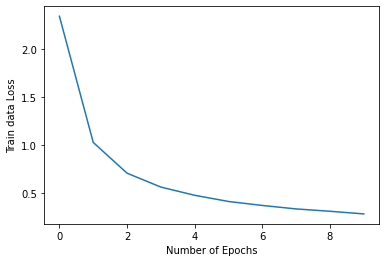

In [ ]:
#### Train loss plot
plt.plot(fit_mod_drop.history['loss'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Train data Loss")

Text(0, 0.5, 'Train data accuracy')

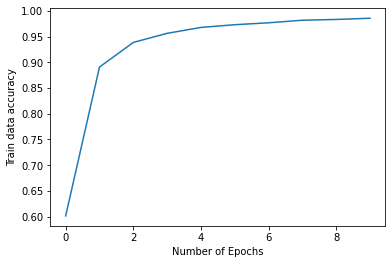

In [ ]:
#### Train Accuracy plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['accuracy'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Train data accuracy")


Text(0, 0.5, 'Validation Loss')

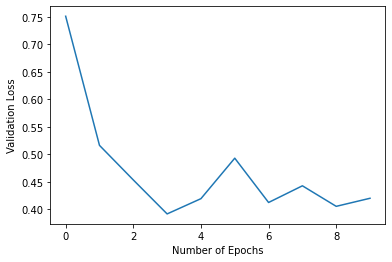

In [ ]:
#### Validation loss plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['val_loss'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Validation Loss")

Text(0, 0.5, 'Validation data accuracy')

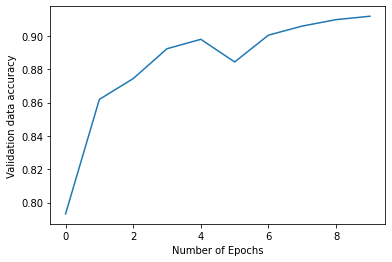

In [ ]:
#### Validation Accuracy plot
import matplotlib.pylab as pylab
plt.plot(fit_mod.history['val_accuracy'])
pylab.xlabel("Number of Epochs")
pylab.ylabel("Validation data accuracy")

In [ ]:
y_pred=model_dropout.predict(x_test)
y_pred_final=np.argmax(y_pred)

In [ ]:
y_pred[0]
#len(y_pred)

array([1.67330560e-21, 2.61866883e-20, 5.23072417e-19, 4.08054618e-10,
       2.88450825e-18, 7.31665423e-12, 3.74072886e-25, 2.83387919e-07,
       1.33095553e-12, 8.02603972e-06, 4.36325238e-12, 2.05036920e-24,
       1.60091027e-12, 1.15690307e-24, 3.83594699e-31, 6.17329906e-19,
       9.99991655e-01, 5.28931545e-26, 8.39419291e-22, 2.82300394e-14,
       4.79123136e-14, 5.20492952e-26, 3.36884292e-28, 6.23798208e-16,
       2.52143673e-26, 2.02206266e-26, 5.39774288e-23, 2.30734851e-26,
       2.48911765e-17, 1.40096581e-14, 1.24088105e-26, 2.33155590e-19,
       1.66561584e-17, 2.55361224e-26, 1.45677686e-25, 1.93607391e-24,
       8.38978128e-28, 5.21676721e-22, 2.68025623e-21, 7.54187404e-19,
       4.00694304e-11, 2.49626268e-14, 1.26115940e-16], dtype=float32)

In [ ]:
ans=[]
for i in range(len(y_pred)):
    x=np.argmax(y_pred[i])
    ans.append(x)

In [ ]:
y_test=y_test.numpy()

In [ ]:
ans[:20]

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38]

In [ ]:
y_test[:20]

array([16.,  1., 38., 33., 11., 38., 18., 12., 25., 35., 12.,  7., 23.,
        7.,  4.,  9., 21., 20., 27., 38.], dtype=float32)

# Confusion matrix and classification report

<AxesSubplot:>

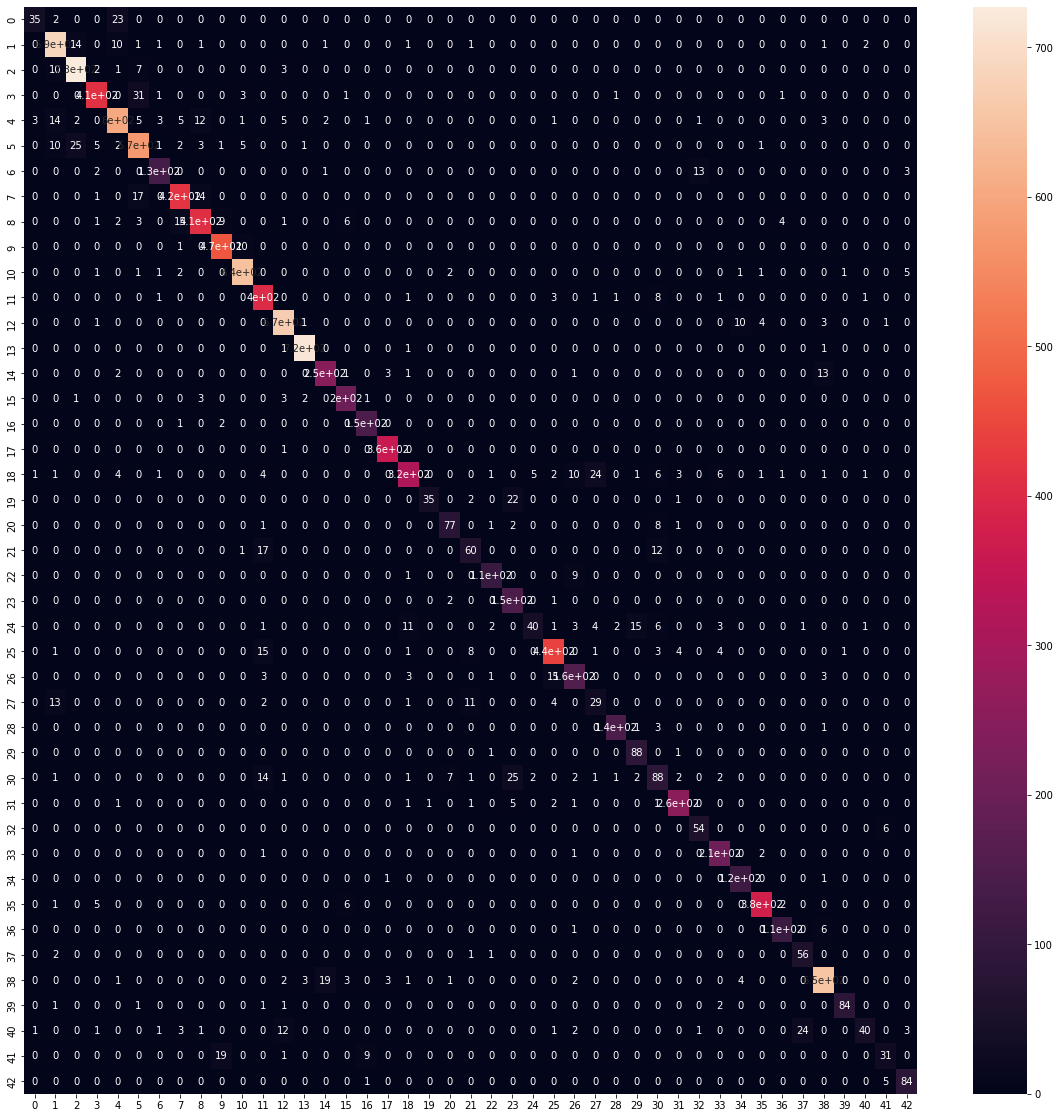

In [ ]:
plt.figure(figsize=(20,20))
cf_matrix = confusion_matrix(y_test, ans)
sns.heatmap(cf_matrix, annot=True)
#x_label('predicted values')
#y_label('actual values')

In [ ]:
print(classification_report(y_test, ans))

              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70        60
         1.0       0.92      0.95      0.94       720
         2.0       0.95      0.97      0.96       750
         3.0       0.96      0.92      0.94       450
         4.0       0.93      0.91      0.92       660
         5.0       0.90      0.91      0.90       630
         6.0       0.93      0.87      0.90       150
         7.0       0.94      0.93      0.93       450
         8.0       0.92      0.91      0.92       450
         9.0       0.94      0.98      0.96       480
        10.0       0.97      0.98      0.97       660
        11.0       0.87      0.96      0.91       420
        12.0       0.96      0.97      0.96       690
        13.0       0.99      1.00      0.99       720
        14.0       0.92      0.92      0.92       270
        15.0       0.92      0.95      0.94       210
        16.0       0.92      0.98      0.95       150
        17.0       0.98    